<hr style="border:3px solid black"></hr>

Contact : dhilip@iitrpr.ac.in <br>

    - Apoorv Kushwaha & Dr. T.J. Dhilip Kumar
        Quantum Dynamics Lab (410), IIT Ropar.
        
# Fitting curve into a function
<hr style="border:3px solid black"></hr>


In [4]:
# Import important libraries
import math
import numpy as np
import pandas as pd
from scipy.special import legendre
import matplotlib.pyplot as plt
import os

<hr style="border:2px solid black"></hr>

### Import V_lambdas
<span style="color:green"><u> Example Input </u></span>

    Input name 1 : 2D_Vlam.dat            # file name containing V_lambda
    Separation: ,                             # Separation: Options are comma (,) and tab (\t), multiple spaces(\s+), etc. 
***
<span style="color:indigo"><u> Example Output</u></span>
   
       Prints dataframe containing radial coefficients.
<hr style="border:2px solid black"></hr>

In [15]:
# saving location of required folders
input_dir = os.getcwd()+'/'
out_data = input_dir + 'data/2D_MP/'
out_plots = input_dir + 'data/CODE_4/'

df_Vnf  = pd.read_csv(out_data+'2D_Vlam.dat',sep=',')  # import Vlam file
x_dummy = df_Vnf.pop('R').to_numpy()      # removing R column from df_Vnf and saving to df_R
lm  = len(df_Vnf.columns)                 # getting number of V_lam_terms
sym = 2                                   # step size for lambda (symmetric -> 2, else -> 1) 

In [284]:
x_dummy[25:80]

array([4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7,
       5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ,
       7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3,
       8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6,
       9.7, 9.8, 9.9])

In [10]:
# # Plot raw data
# # change x and y limits (in plot) as needed for each plot!

# for i in range(0,lm):
#     y_dummy = df_Vnf[str(i*2)]        # reads column names (which were originally interegrs) as string
    
#     # Plot the data
#     plt.scatter(df_R, y_dummy,s=20, color='#00b3b3', label='Data')
#     plt.title("V_lambda = %d" %(i*2))
#     plt.ylim(-15, 15)
#     plt.xlim(2, 10)
#     plt.show()

## Plots 
<hr style="border:2px solid black"></hr>

<span style="color:indigo"><u> Example Output</u></span>
   
       Plots each V_lambda individually (at different x, y limits) and saves in /plots/CODE_4/
       Plots all V_lambda combined and saves in /plots/CODE_4/
       X axis is in Angstroms and Y is in cm-1. 

- In MOLSCAT arrays NPOWER, E and A control curve fitting parameters. (READ HERE):
- https://github.com/molscat/molscat
- The 3 common functions are included that can be edited.

<hr style="border:2px solid black"></hr>


In [216]:
# Template functions to fit V_lambdas

from scipy.optimize import curve_fit

d,e,f,rmsx2 = np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm)
g,h,l,k,rmsx3 = np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm)
m,n,o,p,rmsx5 = np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm)

# A more generalized function will give less error but overfit

def exp_fit_3(x, d,e,f):
    return  d*np.exp(-1.2*x)+ e*np.exp(-3.25*x)+ f*np.exp(-3.8*x)

def fit_12_exp(x, g,h,l,k):
    return  g*np.exp(-l*x)+ h*np.power(x,-k)

def fit_12_6(x, m,n,o,p):
    return  m*np.power(x,-o) + n*np.power(x,-p)


V_lam =  0 	 : 		Error 		 Covarance
exp_fit_3 	 : 	  0.013616423901839904 370888682772.64453
fit_12_exp 	 : 	  0.04740115616118109 9.773670762304012e+23
fit_12_6 	 : 	  0.18122795604495864 1.8256643074622043e+23


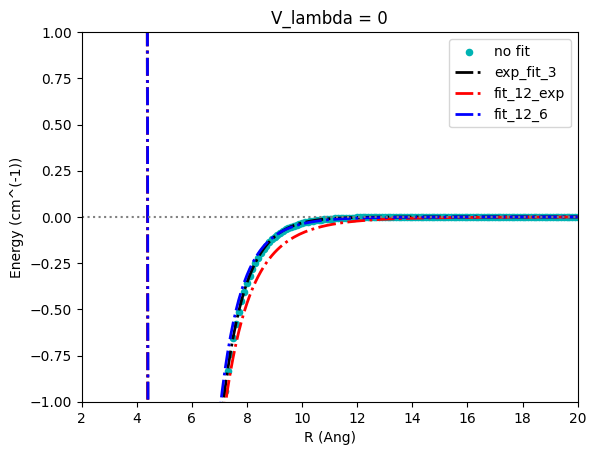

V_lam =  2 	 : 		Error 		 Covarance
exp_fit_3 	 : 	  0.018751357554106885 1755559803550.2983
fit_12_exp 	 : 	  0.08662633234426079 4.9065298985977766e+25
fit_12_6 	 : 	  0.2764562579553838 5.550177757606975e+33


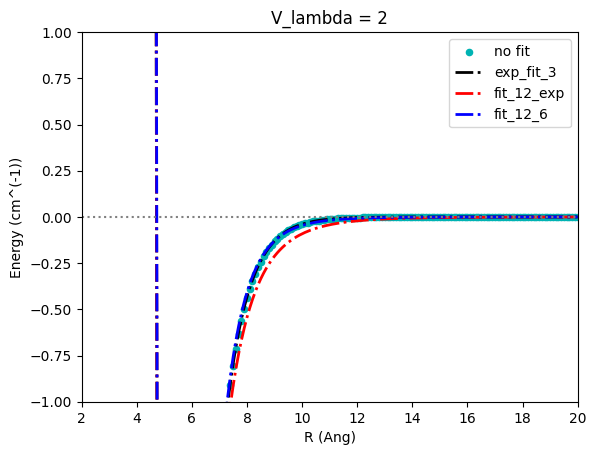

V_lam =  4 	 : 		Error 		 Covarance
exp_fit_3 	 : 	  0.0018607284949490072 66378974794065.99
fit_12_exp 	 : 	  0.03509337506182034 1.308392012983707e+20
fit_12_6 	 : 	  0.15168234151762003 3.926356386056797e+37


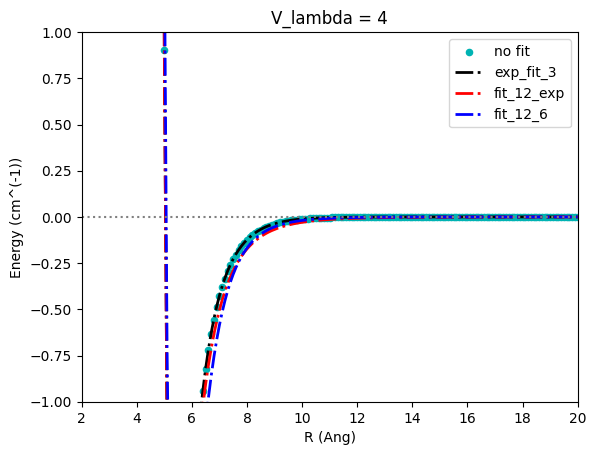

V_lam =  6 	 : 		Error 		 Covarance
exp_fit_3 	 : 	  0.0008045612359223432 111576739079221.03
fit_12_exp 	 : 	  0.018521433844299568 2.8184209267360016e+20
fit_12_6 	 : 	  0.10059426741061647 3.7163505453227014e+36


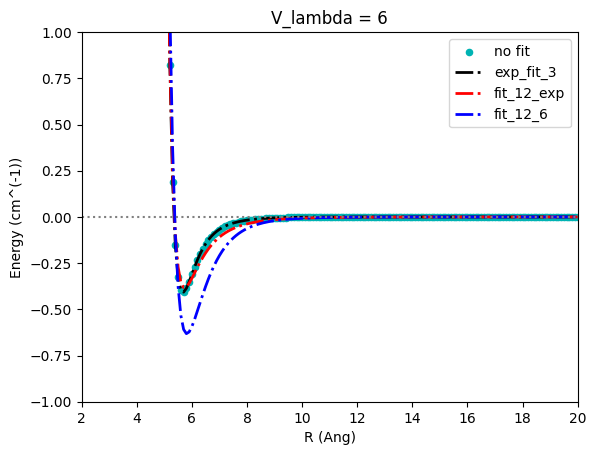

V_lam =  8 	 : 		Error 		 Covarance
exp_fit_3 	 : 	  0.000946494214317787 23498981518435.848
fit_12_exp 	 : 	  0.015332470956512688 4.783174608921139e+25
fit_12_6 	 : 	  0.09622902003709087 5.055127978709335e+23


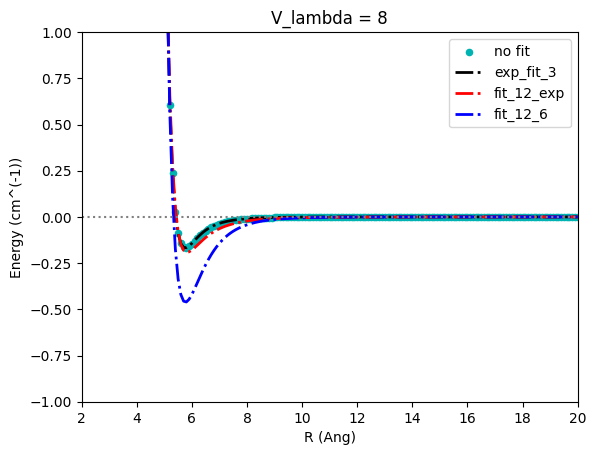

V_lam =  10 	 : 		Error 		 Covarance
exp_fit_3 	 : 	  0.0004975623954418283 23498959511446.516
fit_12_exp 	 : 	  0.007707174751970167 1.1519820020453326e+25
fit_12_6 	 : 	  0.04854157818945057 3.1943732860657516e+35


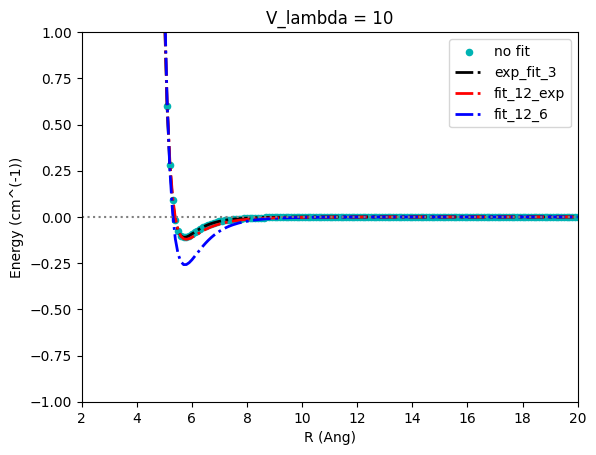

V_lam =  12 	 : 		Error 		 Covarance
exp_fit_3 	 : 	  9.573805707901072e-05 111576756506550.58
fit_12_exp 	 : 	  0.002033499393061674 1.0015437624993096e+26
fit_12_6 	 : 	  0.01158015302343485 1.7132561687606094e+24


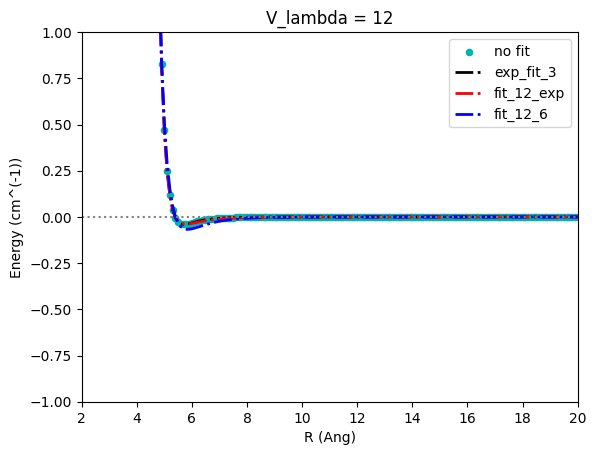

In [290]:
# select inital range for analytical fit (leave high energy points for beter fit)!

# starting point for fitting into function
ini_val = [17,20,27,28,25,25,28] 
#ini_val = [19,22,23,22,20,19,17] 
# cov and error variables
covx1,covx2,covx3 = np.zeros(lm),np.zeros(lm),np.zeros(lm)
er1,er2,er3 = np.zeros(lm),np.zeros(lm),np.zeros(lm)

# Fitting data into analytic function and plotting for visualization
for ii in range(0,lm):
    y_dummy = df_Vnf[str(ii*sym)]
    
    # fitting with various functions
    
    parsx1, covx1 = curve_fit(f=exp_fit_3, xdata=x_dummy[ini_val[ii]:], ydata=y_dummy[ini_val[ii]:], 
                                  p0=[0,0,1000])
    d[ii],e[ii],f[ii] = parsx1
    
    parsx2, covx2 = curve_fit(f=fit_12_exp, xdata=x_dummy[ini_val[ii]:], ydata=y_dummy[ini_val[ii]:], 
                            p0=[0,1000,1,7],bounds=((-np.inf, -np.inf, 0.5,6), (np.inf, np.inf, 5,8)))
    g[ii],h[ii],l[ii],k[ii] = parsx2
    
    parsx3, covx3 = curve_fit(f=fit_12_6, xdata=x_dummy[ini_val[ii]:], ydata=y_dummy[ini_val[ii]:], 
                                  p0=[0,1000,1,1],bounds=((-np.inf, -np.inf, 0,0), (np.inf, np.inf, 10,16)))
    m[ii],n[ii],o[ii],p[ii] = parsx3
    
    # calculate error for each fir
    er1[ii] = np.sqrt(np.average(np.power((exp_fit_3 (x_dummy[ini_val[ii]:], *parsx1) - y_dummy[ini_val[ii]:]),2)))
    er2[ii] = np.sqrt(np.average(np.power((fit_12_exp (x_dummy[ini_val[ii]:], *parsx2) - y_dummy[ini_val[ii]:]),2)))
    er3[ii] = np.sqrt(np.average(np.power((fit_12_6(x_dummy[ini_val[ii]:], *parsx3) - y_dummy[ini_val[ii]:]),2)))
    
    # print error and covariance
    print('V_lam = ', ii*sym, '\t : \t\tError \t\t Covarance')
    print('exp_fit_3 \t : \t ', er1[ii], np.linalg.cond(covx1))
    print('fit_12_exp \t : \t ', er2[ii], np.linalg.cond(covx2))
    print('fit_12_6 \t : \t ', er3[ii], np.linalg.cond(covx3))
    
    # plot original curve
    plt.scatter(x_dummy, y_dummy,s=20, color='#00b3b3',label = 'no fit')
    
    # plot fitted curves
    plt.plot(x_dummy,  exp_fit_3(x_dummy, *parsx1), linestyle='-.', linewidth=2, color='black', label = 'exp_fit_3')
    plt.plot(x_dummy,  fit_12_exp(x_dummy, *parsx2), linestyle='-.', linewidth=2, color='red', label = 'fit_12_exp')
    plt.plot(x_dummy, fit_12_6(x_dummy, *parsx3), linestyle='-.', linewidth=2, color='blue', label = 'fit_12_6')
    
    plt.legend(loc="upper right")
    plt.ylabel("Energy (cm^(-1))")
    plt.xlabel("R (Ang)")
    plt.axhline(y=0, color='grey', linestyle=':')
    plt.title("V_lambda = %d" %(ii*sym))
    plt.ylim(-1, 1)
    plt.xlim(2, 20)
    plt.show()
        

#### Template for saving each V lambdas as required by molscat!


In [ ]:
# select inital range for analytical fit (leave high energy points for beter fit)!

# starting point for fitting into function
ini_val = [17,20,27,28,25,25,24] 
#ini_val = [19,22,23,22,20,19,17] 
# cov and error variables
covx1,covx2,covx3 = np.zeros(lm),np.zeros(lm),np.zeros(lm)
er1,er2,er3 = np.zeros(lm),np.zeros(lm),np.zeros(lm)

# Fitting data into analytic function and plotting for visualization
for ii in range(0,lm):
    y_dummy = df_Vnf[str(ii*sym)]
    
    # fitting with various functions
    
    parsx1, covx1 = curve_fit(f=exp_fit_3, xdata=x_dummy[ini_val[ii]:], ydata=y_dummy[ini_val[ii]:], 
                                  p0=[0,0,1000])
    d[ii],e[ii],f[ii] = parsx1
    
    parsx2, covx2 = curve_fit(f=fit_12_exp, xdata=x_dummy[ini_val[ii]:], ydata=y_dummy[ini_val[ii]:], 
                            p0=[0,1000,1,7],bounds=((-np.inf, -np.inf, 0.5,6), (np.inf, np.inf, 5,8)))
    g[ii],h[ii],l[ii],k[ii] = parsx2
    
    parsx3, covx3 = curve_fit(f=fit_12_6, xdata=x_dummy[ini_val[ii]:], ydata=y_dummy[ini_val[ii]:], 
                                  p0=[0,1000,1,1],bounds=((-np.inf, -np.inf, 0,0), (np.inf, np.inf, 10,16)))
    m[ii],n[ii],o[ii],p[ii] = parsx3

        # calculate error for each fir
    er1[ii] = np.sqrt(np.average(np.power((exp_fit_3 (x_dummy[ini_val[ii]:], *parsx1) - y_dummy[ini_val[ii]:]),2)))
    er2[ii] = np.sqrt(np.average(np.power((fit_12_exp (x_dummy[ini_val[ii]:], *parsx2) - y_dummy[ini_val[ii]:]),2)))
    er3[ii] = np.sqrt(np.average(np.power((fit_12_6(x_dummy[ini_val[ii]:], *parsx3) - y_dummy[ini_val[ii]:]),2)))
    
    # print error and covariance
    print('V_lam = ', ii*sym, '\t : \t\tError \t\t Covarance')
    print('exp_fit_3 \t : \t ', er1[ii], np.linalg.cond(covx1))
    print('fit_12_exp \t : \t ', er2[ii], np.linalg.cond(covx2))
    print('fit_12_6 \t : \t ', er3[ii], np.linalg.cond(covx3))
    
    # plot original curve
    plt.scatter(x_dummy, y_dummy,s=20, color='#00b3b3',label = 'no fit')
    
    # plot fitted curves
    plt.plot(x_dummy,  exp_fit_3(x_dummy, *parsx1), linestyle='-.', linewidth=2, color='black', label = 'exp_fit_3')
    plt.plot(x_dummy,  fit_12_exp(x_dummy, *parsx2), linestyle='-.', linewidth=2, color='red', label = 'fit_12_exp')
    plt.plot(x_dummy, fit_12_6(x_dummy, *parsx3), linestyle='-.', linewidth=2, color='blue', label = 'fit_12_6')
    
    plt.legend(loc="upper right")
    plt.ylabel("Energy (cm^(-1))")
    plt.xlabel("R (Ang)")
    plt.axhline(y=0, color='grey', linestyle=':')
    plt.title("V_lambda = %d" %(ii*sym))
    plt.ylim(-1, 1)
    plt.xlim(2, 10)
    plt.show()
    
    # Plot each V_lambda_separately to view features and fitting 
    plt.subplot(1,3,1)                      # first subplot at visually appropriate x, y limit
    plt.scatter(R_arr, y_dummy,s=20, color='#00b3b3',
                label = 'no fit')               # scatter plot (blue) with label     
    plt.plot(xdummy, exp_fit(xdummy, *parsx), linestyle='-.', linewidth=2, 
             color='black', label = 'exp fit')  # fitted plot

    plt.grid(True,linestyle=':')                # grid on
    plt.minorticks_on()                         # minor ticks are on
    plt.title("V_lambda = %d" %(i*sym))         # title of plot
    plt.ylim(max(y_dummy.min()-10,-200), 100)   # y limit
    plt.xlim(3, R_arr.max())                    # x limit
    
    plt.subplot(1,3,2)                      # second subplot at maximum x, y limit
    plt.scatter(R_arr, y_dummy,s=20, color='#00b3b3',label = 'no fit')
    plt.plot(xdummy, exp_fit(xdummy, *parsx), linestyle='-.', linewidth=2, color='black', label = 'exp fit')
    plt.grid(True,linestyle=':')
    plt.minorticks_on() 
    plt.title("V_lambda = %d" %(i*sym))
    plt.ylim(y_dummy.min(), y_dummy.max())
    plt.xlim(R_arr.min()-0.5, R_arr.max())

    plt.subplot(1,3,3)                      # third subplot at zoomed in y limit [-1, +1]
    plt.scatter(R_arr, y_dummy,s=20, color='#00b3b3',label = 'no fit')
    plt.plot(xdummy, exp_fit(xdummy, *parsx), linestyle='-.', linewidth=2, color='black', label = 'exp fit')
    plt.grid(True,linestyle=':')
    plt.minorticks_on() 
    plt.title("V_lambda = %d" %(i*sym))
    plt.ylim(-1, 1)
    plt.xlim(4, R_arr.max())
    plt.savefig(out_plots+'V_lam_{}.eps'.format(i*sym), 
                format='eps')               # save individual figure
    
    plt.tight_layout()                      # tight layout
    plt.show()                              # show individual plot
    print('-----'*20)
    print('\n')
    print('Double exponential RMSE = ',np.sqrt(np.average(np.power((exp_fit(x_dummy[strt:], 
                                                                            *parsx) - y_dummy[strt:]),2))))
    rmsx[j]=np.sqrt(np.average(np.power((exp_fit(x_dummy[strt:], *parsx) - y_dummy[strt:]),2)))
print('Average fit RMSE = ',np.average(rmsx))


In [64]:
# Template for EXP-3 function

print('LAMBDA = ', end="")
print(*range(0,lm*sym,sym), sep=", " )
print('NTERM  = ', '3,'*lm)
print('NPOWER = ', '0,0,0,'*lm)
print('A      = ')
for j in range (lm):
    print(d[j],',',e[j],',',f[j],',')
print('E      =', '-1,-2,-3,'*10)

LAMBDA = 0, 2, 4, 6, 8, 10, 12
NTERM  =  3,3,3,3,3,3,3,
NPOWER =  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
A      = 
-1627.5712355879446 , -25793427.454651892 , 1216105560.6417735 ,
-1822.49042651185 , -78560913.95276459 , 4394479999.978693 ,
-434.340536801086 , -66379969.76091047 , 4292990411.7380095 ,
2.4417893287669585 , -38658651.50143452 , 2759329700.08101 ,
11.741958703736714 , -18139291.106458824 , 1363487997.5957036 ,
5.237520594496758 , -9733438.930660238 , 721591933.3709937 ,
19.763155321031114 , -5001866.146606168 , 333909314.67911434 ,
E      = -1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,


In [154]:
# Template for EXP and R**-12 Function 

print('LAMBDA = ', end="")
print(*range(0,lm*sym,sym), sep=", " )
print('NTERM  = ', '2,'*lm)
print('NPOWER = ')
for j in range (lm):
    print(0,',',k[j],',')
print('A      = ')
for j in range (lm):
    print(g[j],',',h[j],',')
print('E      = ')
for j in range (lm):
    print(l[j],',')

LAMBDA = 0, 2, 4, 6, 8, 10, 12
NTERM  =  2,2,2,2,2,2,2,
NPOWER = 
0 , 7.507389156223614 ,
0 , 7.999999999999999 ,
0 , 7.999999999999999 ,
0 , 7.999999999999999 ,
0 , 7.9999999999999165 ,
0 , 7.999999999999996 ,
0 , 7.999999999999987 ,
A      = 
1922428622.3953764 , -2812323.855300679 ,
11267991011.274961 , -9128564.917922022 ,
17652996555.37888 , -3595406.506619217 ,
9359292746.738903 , -1299171.8731726632 ,
3133048216.9375544 , -744685.9537702518 ,
1487707028.7756617 , -463773.5190462753 ,
626220616.4636931 , -272432.689775718 ,
E      = 
4.017869933869361 ,
4.1400914550829855 ,
4.251973537473859 ,
4.198092401811288 ,
4.0947294012154405 ,
4.067230275747736 ,
4.050631908254478 ,


In [174]:
# Template for LJ (12-6)

print('LAMBDA = ', end="")
print(*range(0,lm*sym,sym), sep=", " )
print('NTERM  = ', '2,'*lm)
print('NPOWER = ')
for j in range (lm):
    print(o[j],',',p[j],',')
print('A      = ')
for j in range (lm):
    print(m[j],',',n[j],',')


LAMBDA = 0, 2, 4, 6, 8, 10, 12
NTERM  =  2,2,2,2,2,2,2,
NPOWER = 
7.999999999999999 , 14.343592383321171 ,
7.999999999999999 , 15.999999999999998 ,
7.999999999999999 , 15.999999999999998 ,
7.999999999999999 , 15.999999999999998 ,
7.999999999999999 , 15.366485038471911 ,
7.999999999999999 , 14.804688089579976 ,
7.999999999999999 , 13.834073414822239 ,
A      = 
-9120706.871012868 , 110337619442.15509 ,
-13681619.722890789 , 3406601339316.652 ,
-8928853.558005236 , 3425912987673.185 ,
-4686692.838826049 , 2265565438471.2637 ,
-2752149.3168551866 , 482808505584.24054 ,
-1949001.280876823 , 123147214246.37027 ,
-1534014.623254082 , 16588945661.570967 ,
